# Hierarchical Clustering


In [ ]:
from sklearn.datasets import make_blobs

# 합성데이터 생성
X, y = make_blobs(random_state=0, n_samples=11)

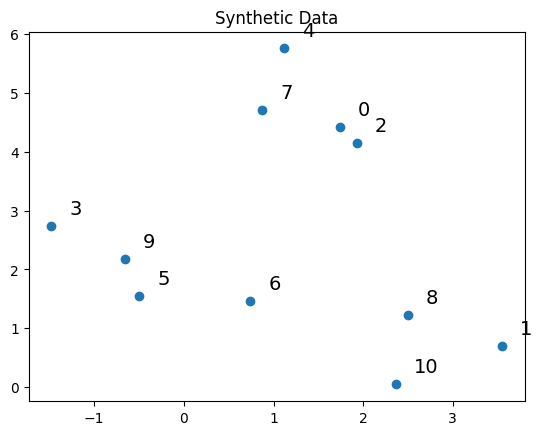

In [ ]:
import matplotlib.pyplot as plt

# 합성데이터 확인
plt.scatter(X[:, 0], X[:, 1]); 
plt.title('Synthetic Data')
labels = [str(label) for label in range(len(X))]
for i, txt in enumerate(labels):
    plt.annotate(txt, X[i], xytext=X[i]+0.2, size = 14)

In [ ]:
from scipy.cluster.hierarchy import ward

linkage_array = ward(X)
linkage_array

array([[ 0.        ,  2.        ,  0.3320945 ,  2.        ],
       [ 5.        ,  9.        ,  0.64580193,  2.        ],
       [ 4.        ,  7.        ,  1.07256525,  2.        ],
       [ 1.        ,  8.        ,  1.1803787 ,  2.        ],
       [10.        , 14.        ,  1.30311575,  3.        ],
       [ 3.        , 12.        ,  1.4440339 ,  3.        ],
       [11.        , 13.        ,  1.78595107,  4.        ],
       [ 6.        , 16.        ,  2.15981886,  4.        ],
       [15.        , 18.        ,  6.55024854,  7.        ],
       [17.        , 19.        ,  7.63663025, 11.        ]])

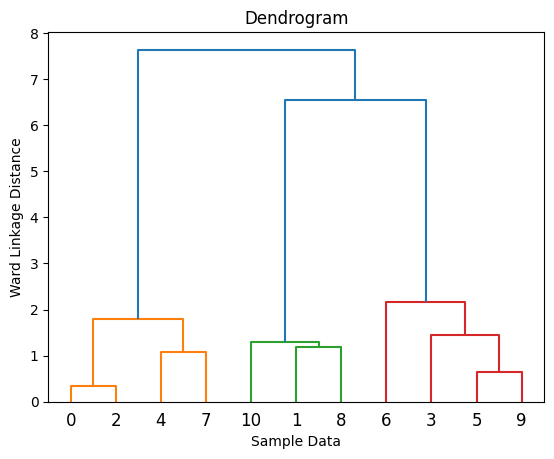

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_array)
plt.title('Dendrogram')         
plt.xlabel("Sample Data")
plt.ylabel("Ward Linkage Distance");        

# K-means
## Case#1

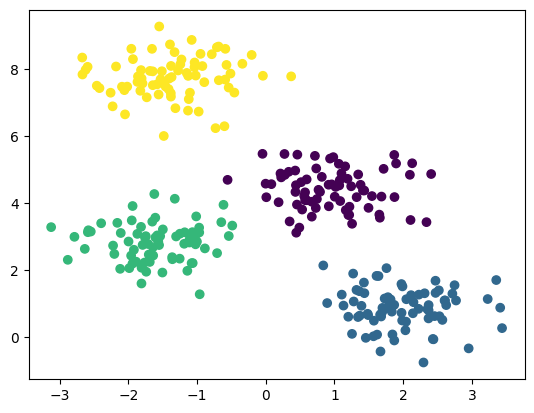

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 합성데이터 생성
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) #n_features: default 2
plt.scatter(X[:,0], X[:,1], c=y);

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init='auto', random_state=0)
kmeans.fit(X);

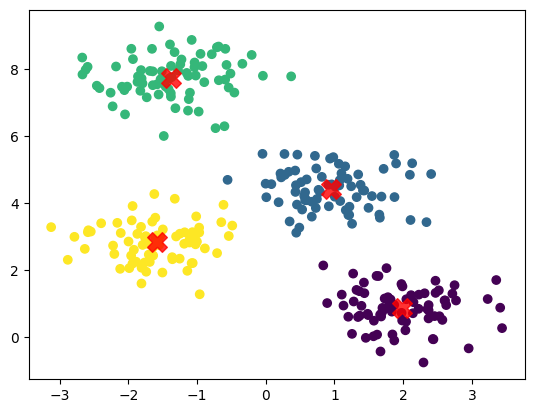

In [ ]:
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='X', c='Red', s=200, alpha=0.8);

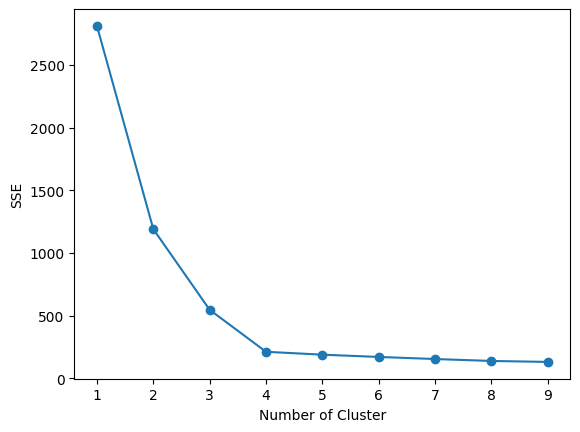

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow point 선택하기
sse = []
iter = 10
for i in range(1,iter):
    kmeans = KMeans(n_clusters=i, init='random', 
                    n_init=10, max_iter=100, 
                    tol=1e-04, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1,iter), sse, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

# K-means
## Case#2

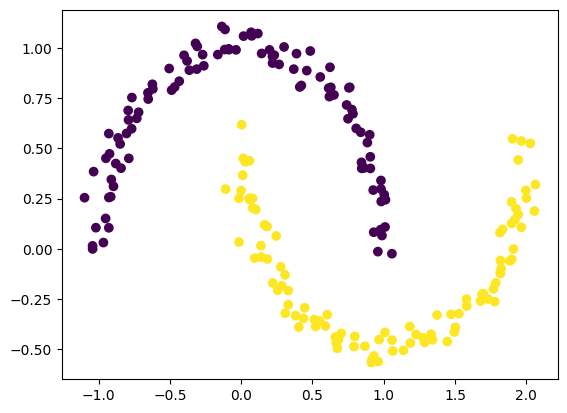

In [ ]:
from sklearn.datasets import make_moons

# 합성데이터 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y);

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)
kmeans.fit(X);

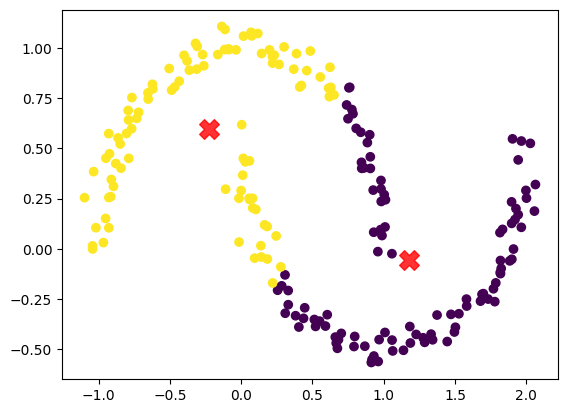

In [ ]:
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='Red', marker='X', s=200, alpha=0.8);

# K-means
## Case#3

In [ ]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

print(f'X.shape: {X.shape}, y: {np.unique(y)}')

X.shape: (1797, 64), y: [0 1 2 3 4 5 6 7 8 9]


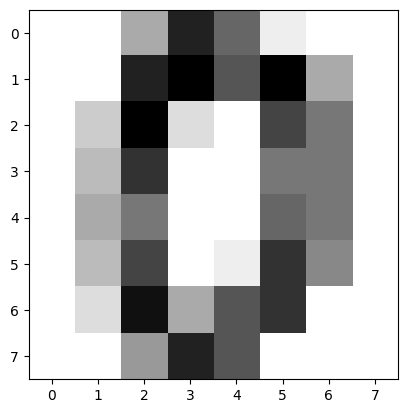

In [ ]:
import matplotlib.pyplot as plt

img = X.reshape(1797,8,8)
plt.imshow(img[0], cmap=plt.cm.binary);

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init='auto', random_state=0)
kmeans.fit(X);

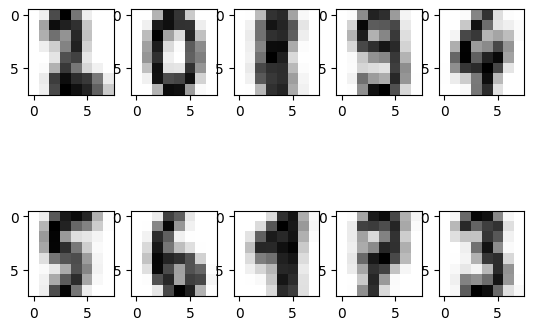

In [ ]:
centers = kmeans.cluster_centers_.reshape(10,8,8)

fig = plt.figure()

for i in range(10):
    axes = fig.add_subplot(2,5,i+1)
    axes.imshow(centers[i], cmap=plt.cm.binary); 

# DBSCAN
## Case#1

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 합성데이터 생성
X, y = make_moons(n_samples=200, noise=0.08, random_state=42)
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X);

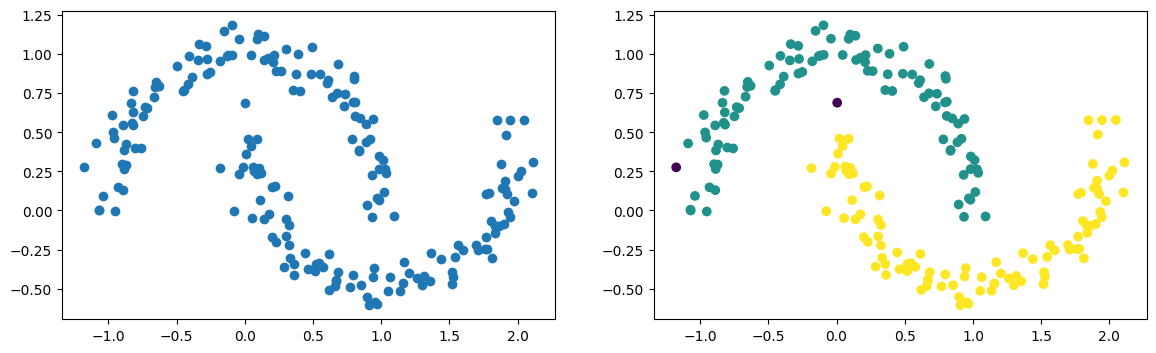

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1], c=dbscan.labels_);

# DBSCAN
## Case#2

In [ ]:
from sklearn.datasets import make_circles

# 합성데이터 생성
X, y = make_circles(n_samples=200, noise=0.05, factor=0.4)
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(X);

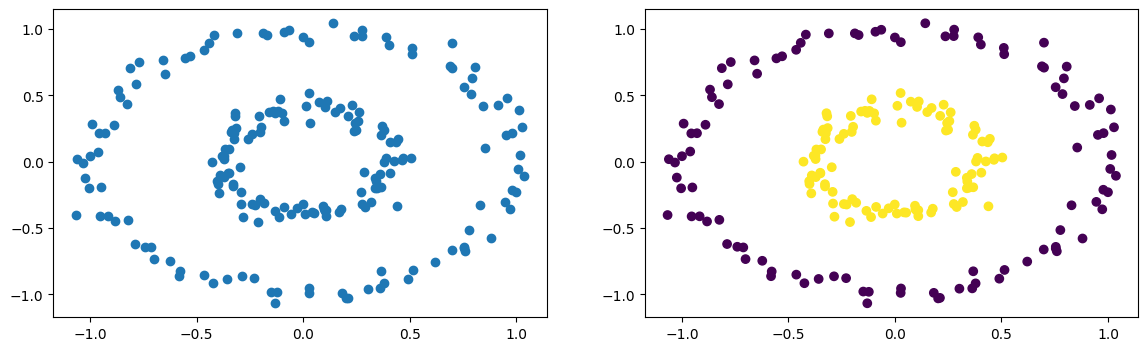

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1], c=dbscan.labels_);